In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import torch
import torchvision.datasets as datasets
import matplotlib.pyplot as plt
import numpy as np
import os

%matplotlib inline
%load_ext autoreload
%autoreload 2

In [3]:
mnist_trainset = datasets.MNIST(root='../data', train=True, download=True, transform=None)
n_samples = 1000
dataset = mnist_trainset.data.reshape(-1, 1, 28, 28)[:n_samples] / 255.

100%|██████████| 9912422/9912422 [00:00<00:00, 16917627.01it/s]


Extracting ../data/MNIST/raw/train-images-idx3-ubyte.gz to ../data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 61490199.91it/s]

Extracting ../data/MNIST/raw/train-labels-idx1-ubyte.gz to ../data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 4791781.09it/s]


Extracting ../data/MNIST/raw/t10k-images-idx3-ubyte.gz to ../data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 15822698.31it/s]

Extracting ../data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ../data/MNIST/raw



In [ ]:
print(dataset.shape)

In [13]:
with h5py.File("../MRS_data/track_02_test_data.h5") as hf:
    gt_fids = hf["transient_fids"][()] #ground truth free induction decay signal value
    ppm = hf["ppm"][()] #ppm vector
gt_spec = np.fft.fftshift(np.fft.ifft(gt_fids,axis=1),axes=1)
y = np.real(gt_spec[:,:,1]-gt_spec[:,:,0])
y = y.swapaxes(0,2).swapaxes(1,2)
y = np.reshape(y, [y.shape[0]*y.shape[1], 1, 2048])
y_max = y.max(axis=2, keepdims=True)
y_mean = y.mean(axis=2, keepdims=True)
y = (y - y_mean) / (y_max - y_mean)
ppm = ppm[0]

In [25]:
transient = 4

In [15]:
print(y[0].shape)

(1, 2048)


Text(0.5, 1.0, 'Ground truth spectrum')

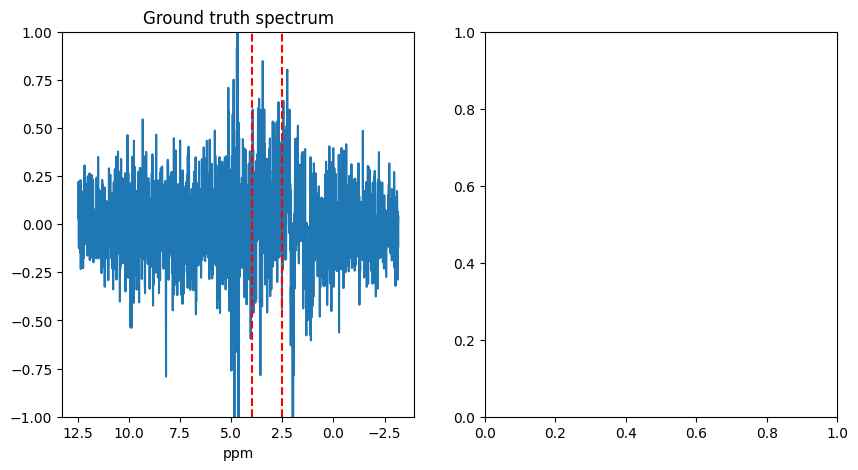

In [26]:
min_ppm = 2.5
max_ppm = 4
max_ind = np.amax(np.where(ppm >= min_ppm))
min_ind = np.amin(np.where(ppm <= max_ppm))

#y_crop = y[transient][min_ind:max_ind]
#x_crop = y[transient+1][min_ind:max_ind]
#y_crop_norm = (y_crop-y_crop.min())/(y_crop.max()-y_crop.min())
#x_crop_norm = (x_crop-x_crop.min())/(x_crop.max()-x_crop.min())

ppm_crop = ppm[min_ind:max_ind]

fig,ax = plt.subplots(1,2,figsize=(10,5))
#mse = np.square(y_crop_norm-x_crop_norm).mean()
ax[0].plot(ppm,y[transient][0],label="ground-truth1")
#ax[0].plot(ppm,y[transient+1][0],label="ground-truth2")
ax[0].set_xlabel("ppm")
ax[0].set_ylim(-1,1)
ax[0].invert_xaxis()
ax[0].vlines([min_ppm,max_ppm],-1,1,colors="red",linestyles="--")
ax[0].set_title("Ground truth spectrum")

#print(f"MSE: {mse}")